Ejercicio 6 - Redes Neuronales con Keras

En este ejercicio, tu objetivo será entrenar modelos de Redes Neuronales utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib 
import matplotlib.pyplot as plt
import utils

Using matplotlib backend: Qt5Agg


# Entrena un modelo de Redes Neuronales con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?

In [4]:
import tensorflow as tf
import keras
import numpy as np
import utils 
import os

# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
dataset = "2_clases_simple.csv"
#dataset = "6_clases_dificil.csv"
#dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"
#dataset = "circulos.csv"

# Dataset con más de 2 dimensiones
# dataset = "iris.csv"
# dataset = "diabetes.csv"

# Carga del dataset
dataset_path=os.path.join("datasets_clasificacion",dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:-1],data[:,-1]
# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape
# calcula la cantidad de clases
classes=int(y.max()+1)

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

Información del conjunto de datos:
Ejemplos: 1000
Variables de entrada: 2
Cantidad de clases: 2


Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)
Epoch 1/100
1000/1000 [==============================] - 0s 166us/step - loss: 0.6815 - acc: 0.5680
Epoch 2/100
1000/1000 [==============================] - 0s 100us/step - loss: 0.6691 - acc: 0.5720
Epoch 3/100
1000/1000 [==============================] - 0s 85us/step - loss: 0.6570 - acc: 0.5830
Epoch 4/100
1000/1000 [==============================] - 0s 95us/step - loss: 0.6456 - acc: 0.5880
Epoch 5/100
1000/1000 [==============================] - 0s 87us/step - loss: 0.6345 - acc: 0.5950
Epoch 6/100
1000/1000 [==============================] - 0s 82us/step - loss: 0.6237 - acc: 0.6040
Epoch 7/100
1000/1000 [==============================] - 0s 83us/step - loss: 0.6135 - acc: 0.6170
Epoch 8/100
1000/1000 [==============================] - 0s 74us/step - loss: 0.6036 - acc: 0.6290
Epoch 9/100
1000/1000 [==============================] - 0s 90us/step - loss: 0.5942 - acc: 0.6320
Epoch 

Epoch 82/100
1000/1000 [==============================] - 0s 69us/step - loss: 0.2102 - acc: 0.9910
Epoch 83/100
1000/1000 [==============================] - 0s 71us/step - loss: 0.2074 - acc: 0.9910
Epoch 84/100
1000/1000 [==============================] - 0s 82us/step - loss: 0.2046 - acc: 0.9920
Epoch 85/100
1000/1000 [==============================] - 0s 84us/step - loss: 0.2018 - acc: 0.9920
Epoch 86/100
1000/1000 [==============================] - 0s 85us/step - loss: 0.1991 - acc: 0.9920
Epoch 87/100
1000/1000 [==============================] - 0s 85us/step - loss: 0.1964 - acc: 0.9920
Epoch 88/100
1000/1000 [==============================] - 0s 74us/step - loss: 0.1938 - acc: 0.9920
Epoch 89/100
1000/1000 [==============================] - 0s 92us/step - loss: 0.1912 - acc: 0.9930
Epoch 90/100
1000/1000 [==============================] - 0s 73us/step - loss: 0.1887 - acc: 0.9930
Epoch 91/100
1000/1000 [==============================] - 0s 72us/step - loss: 0.1862 - acc: 0.9930


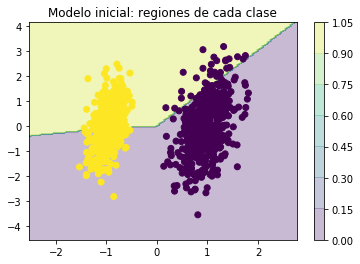

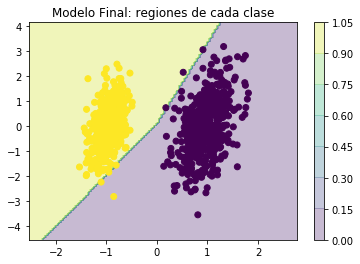

In [6]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

# Creo un modelo logístico
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),
    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(5, activation='tanh'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo inicial",detail=0.05)



modelo.compile(
  optimizer=keras.optimizers.SGD(lr=0.001), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
modelo.fit(x,y,epochs=100,batch_size=32)


# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo Final",detail=0.05)